# Train, Validation e Test Split

## Introdução

Após implementar um modelo de Machine Learning, surge uma questão fundamental: **como sabemos se nosso modelo realmente funciona bem?** Treinar um modelo e testá-lo nos mesmos dados não é suficiente, pois isso não garante que ele funcionará bem com dados novos que nunca viu antes.

A divisão dos dados em conjuntos de **treinamento**, **validação** e **teste** é uma prática essencial para avaliar corretamente o desempenho de modelos de aprendizado de máquina.

---

## O Problema: Overfitting vs Underfitting

### Overfitting (Sobreajuste)

**Overfitting** ocorre quando o modelo "decora" os dados de treinamento, capturando não apenas os padrões reais, mas também o ruído e peculiaridades específicas daqueles dados.

**Características:**
- ✅ Performance **excelente** nos dados de treinamento
- ❌ Performance **ruim** em dados novos
- O modelo é muito específico e não generaliza

**Analogia:** É como um aluno que decora as respostas de provas antigas, mas não entende os conceitos. Ele vai bem nas provas antigas, mas falha em questões novas.

### Underfitting (Subajuste)

**Underfitting** ocorre quando o modelo é muito simples e não consegue capturar os padrões presentes nos dados.

**Características:**
- ❌ Performance **ruim** nos dados de treinamento
- ❌ Performance **ruim** em dados novos
- O modelo é simples demais

**Analogia:** É como um aluno que não estudou o suficiente e não consegue responder nem as questões básicas.

### O Equilíbrio Ideal

O objetivo é encontrar o **ponto ideal** onde o modelo:
- Aprende os padrões reais dos dados
- Generaliza bem para dados novos
- Não decora peculiaridades específicas

---

## Train/Test Split (Divisão Básica)

### Conceito

A divisão mais simples separa os dados em **dois conjuntos**:

1. **Training Set (Conjunto de Treinamento)**: ~70-80% dos dados
   - Usado para treinar o modelo
   - O modelo aprende os padrões aqui

2. **Test Set (Conjunto de Teste)**: ~20-30% dos dados
   - Usado **apenas** para avaliar o modelo final
   - Simula dados "do mundo real" que o modelo nunca viu

### Por Que Fazer Isso?

**Sem divisão:**
```
Treina no dataset → Testa no mesmo dataset → R² = 0.99 ✅
```
Parece ótimo, mas é **enganoso**! O modelo pode estar apenas decorando.

**Com divisão:**
```
Treina no training set → Testa no test set → R² = 0.95 ✅
```
Agora temos uma medida **real** de como o modelo generaliza.

### Proporções Típicas

| Tamanho do Dataset | Train | Test |
|-------------------|-------|------|
| Pequeno (< 1000) | 70% | 30% |
| Médio (1k-100k) | 80% | 20% |
| Grande (> 100k) | 90% | 10% |

**Regra geral:** Quanto mais dados você tem, menor a porcentagem necessária para teste.

---

## Train/Validation/Test Split (Divisão Completa)

### Conceito

Para projetos mais robustos, dividimos os dados em **três conjuntos**:

1. **Training Set**: ~60-70% dos dados
   - Usado para treinar o modelo
   - Ajusta os parâmetros (w, b)

2. **Validation Set**: ~15-20% dos dados
   - Usado para **tunar hiperparâmetros**
   - Comparar diferentes modelos
   - Detectar overfitting durante o treinamento
   - **Não** é usado para treinar

3. **Test Set**: ~15-20% dos dados
   - Usado **apenas uma vez** no final
   - Avaliação final e imparcial
   - Simula o desempenho em produção


### Por Que Três Conjuntos?

**Problema com apenas Train/Test:**
- Se usarmos o test set para ajustar hiperparâmetros, ele "vaza" informação (data leakage)
- O test set deixa de ser imparcial
- Podemos fazer overfitting no test set!

**Solução com Train/Validation/Test:**
- **Validation** é usado para experimentação e ajustes
- **Test** permanece "intocado" até o final
- Temos uma avaliação verdadeiramente imparcial

---

## Divisão Aleatória vs Estratificada

### Divisão Aleatória

Seleciona exemplos **aleatoriamente** para cada conjunto.

```python
np.random.shuffle(data)
train = data[:60%]
val = data[60%:80%]
test = data[80%:]
```

**Quando usar:**
- Dados balanceados
- Regressão (valores contínuos)
- Datasets grandes

### Divisão Estratificada

Mantém a **mesma proporção de classes** em todos os conjuntos.

**Quando usar:**
- Classificação com classes desbalanceadas
- Ex: 95% classe A, 5% classe B
- Garante que train, val e test tenham ~95%/5%

---

## Boas Práticas

###  O Que Fazer

1. **Dividir ANTES de qualquer processamento**
   - Normalize depois da divisão
   - Evita "data leakage"

2. **Nunca treinar com dados de validação/teste**
   - Validação é apenas para avaliar
   - Teste é apenas para avaliação final

3. **Manter test set "sagrado"**
   - Use apenas UMA VEZ no final
   - Não ajuste nada baseado nele

4. **Shuffle (embaralhar) os dados**
   - Evita bias se dados estão ordenados

###  O Que NÃO Fazer

1. Normalizar antes de dividir (causa data leakage)
2. Usar test set para ajustar hiperparâmetros
3. Treinar com validation/test set
4. Avaliar múltiplas vezes no test set
5. Dividir dados temporais aleatoriamente (use divisão temporal)

---

## Dados Temporais (Time Series)

Para dados com componente temporal (preços de ações, vendas ao longo do tempo), **NÃO embaralhe**!

**Exemplo:**
- Train: Janeiro - Agosto (8 meses)
- Validation: Setembro - Outubro (2 meses)
- Test: Novembro - Dezembro (2 meses)

**Por quê?** 
- Em produção, você sempre prevê o futuro baseado no passado
- Embaralhar cria "vazamento temporal" (model sees the future)

---

## Resumo

| Tipo do Dado | Train Set | Validation Set | Test Set |
|---------|-----------|----------------|----------|
| **Uso** | Treinar modelo | Ajustar hiperparâmetros | Avaliação final |
| **Frequência** | Múltiplas vezes | Múltiplas vezes | **Uma vez** |
| **Tamanho** | 60-80% | 10-20% | 10-20% |
| **Pode treinar?** | ✅ Sim | ❌ Não | ❌ Não |



In [1]:
# ============================================================
# IMPORTAÇÕES
# ============================================================

# Biblioteca para cálculo numérico
import numpy as np

# Biblioteca para visualização
import matplotlib.pyplot as plt

# Função para dividir dados em treino e teste
from sklearn.model_selection import train_test_split

# Modelo de regressão linear
from sklearn.linear_model import LinearRegression

# Métrica R² (coeficiente de determinação)
from sklearn.metrics import r2_score

In [2]:

# ============================================================
# GERAÇÃO DOS DADOS (DATASET SINTÉTICO)
# ============================================================

# Fixa a semente para garantir reprodutibilidade
np.random.seed(42)

# Variável independente X (50 pontos entre 0 e 10)
X = np.random.rand(50, 1) * 10

# Variável dependente y
# Relação linear: y = 2.5x + 5 + ruído
y = 2.5 * X.ravel() + 5 + np.random.randn(50) * 3

In [3]:


# ============================================================
# CENÁRIO 1 — SEM TRAIN/TEST SPLIT (ERRADO)
# ============================================================

print("\n❌ CENÁRIO 1: SEM TRAIN/TEST SPLIT")
print("-" * 70)

# Cria o modelo
model_sem_split = LinearRegression()

# Treina o modelo usando TODOS os dados
model_sem_split.fit(X, y)

# Faz previsões nos mesmos dados usados no treino
y_pred_sem_split = model_sem_split.predict(X)

# Calcula o R² usando treino = teste (problema!)
r2_sem_split = r2_score(y, y_pred_sem_split)

print(f"R² = {r2_sem_split:.4f}")
print("⚠️  Avaliação enganosa: o modelo foi testado nos mesmos dados que treinou!\n")


❌ CENÁRIO 1: SEM TRAIN/TEST SPLIT
----------------------------------------------------------------------
R² = 0.8673
⚠️  Avaliação enganosa: o modelo foi testado nos mesmos dados que treinou!



In [4]:

# ============================================================
# CENÁRIO 2 — COM TRAIN/TEST SPLIT (CORRETO)
# ============================================================

print("=" * 70)
print("✅ CENÁRIO 2: COM TRAIN/TEST SPLIT")
print("-" * 70)

# Divide os dados:
# 70% treino | 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training: {len(X_train)} exemplos | Test: {len(X_test)} exemplos\n")

# Cria o modelo
model_bom = LinearRegression()

# Treina APENAS com dados de treino
model_bom.fit(X_train, y_train)

# Previsões no treino
y_train_pred = model_bom.predict(X_train)

# Previsões em dados NUNCA vistos (teste)
y_test_pred = model_bom.predict(X_test)

# Avaliação correta
r2_train_bom = r2_score(y_train, y_train_pred)
r2_test_bom = r2_score(y_test, y_test_pred)

print(f"R² Training: {r2_train_bom:.4f}")
print(f"R² Test:     {r2_test_bom:.4f}")
print(f"Diferença:   {abs(r2_train_bom - r2_test_bom):.4f}")
print("✨ Modelo generaliza bem!\n")

✅ CENÁRIO 2: COM TRAIN/TEST SPLIT
----------------------------------------------------------------------
Training: 35 exemplos | Test: 15 exemplos

R² Training: 0.8708
R² Test:     0.8503
Diferença:   0.0205
✨ Modelo generaliza bem!



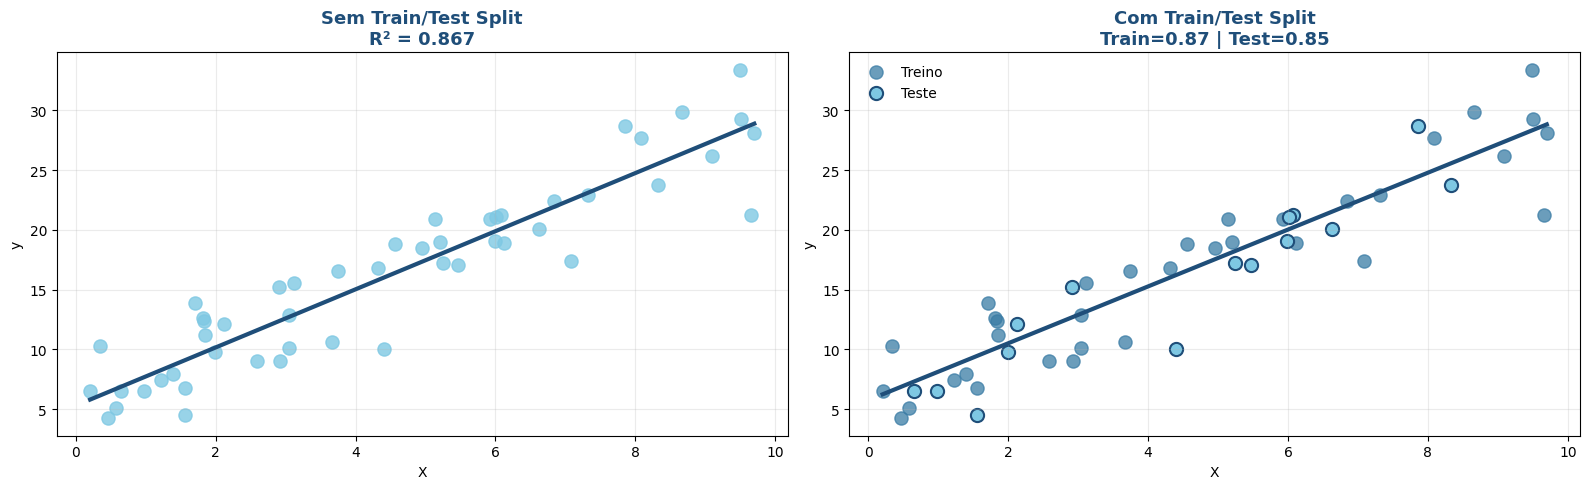

In [5]:
# ============================================================
# VISUALIZAÇÃO — TRAIN vs TEST (VERSÃO LIMPA)
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Linha contínua para a regressão
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Paleta azul
blue_light = "#7EC8E3"
blue_dark = "#1F4E79"
blue_mid = "#3A7CA5"


# ------------------------------------------------------------
# GRÁFICO 1 — SEM SPLIT
# ------------------------------------------------------------

axes[0].scatter(
    X, y,
    s=90,
    color=blue_light,
    alpha=0.8
)

axes[0].plot(
    X_line,
    model_sem_split.predict(X_line),
    color=blue_dark,
    linewidth=3
)

axes[0].set_title(
    f"Sem Train/Test Split\nR² = {r2_sem_split:.3f}",
    fontsize=13,
    fontweight="bold",
    color=blue_dark
)

axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].grid(True, alpha=0.25)


# ------------------------------------------------------------
# GRÁFICO 2 — COM SPLIT
# ------------------------------------------------------------

# Treino
axes[1].scatter(
    X_train, y_train,
    s=90,
    color=blue_mid,
    alpha=0.75,
    label="Treino"
)

# Teste
axes[1].scatter(
    X_test, y_test,
    s=90,
    color=blue_light,
    edgecolor=blue_dark,
    linewidth=1.5,
    label="Teste"
)

# Modelo treinado no treino
axes[1].plot(
    X_line,
    model_bom.predict(X_line),
    color=blue_dark,
    linewidth=3
)

axes[1].set_title(
    f"Com Train/Test Split\nTrain={r2_train_bom:.2f} | Test={r2_test_bom:.2f}",
    fontsize=13,
    fontweight="bold",
    color=blue_dark
)

axes[1].set_xlabel("X")
axes[1].set_ylabel("y")
axes[1].legend(frameon=False)
axes[1].grid(True, alpha=0.25)


plt.tight_layout()
plt.show()